In [106]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [107]:
wine = pd.read_csv('data/winequality-red.csv', encoding = 'utf-8', sep=';')

In [108]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [109]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [110]:
np.min(wine['fixed acidity'])

4.6

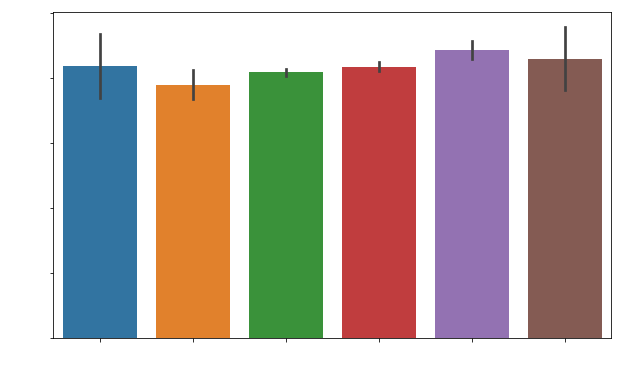

In [111]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('fixed acidity', fontsize=16, color='white')
plt.show()

In [112]:
wine['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

Text(0, 0.5, 'volatile acidity')

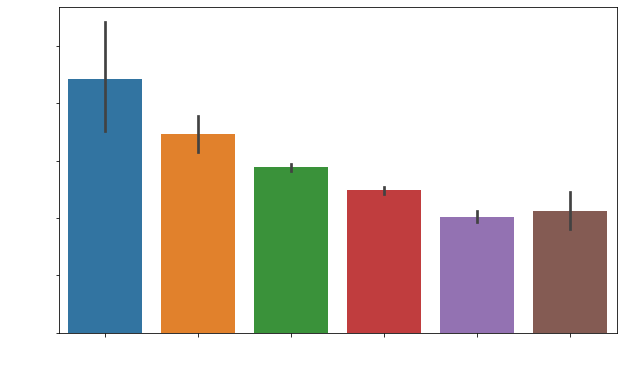

In [113]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('volatile acidity', fontsize=16, color='white')

Text(0, 0.5, 'citric acid')

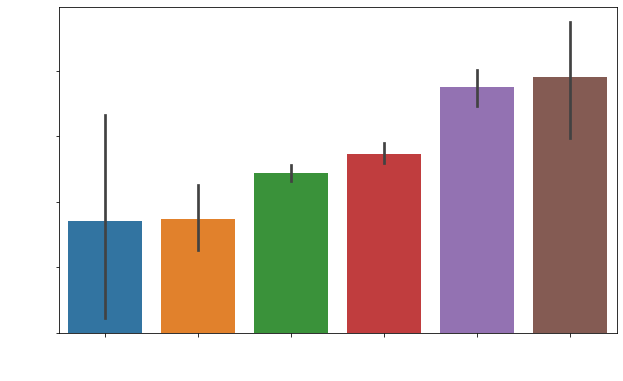

In [114]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('citric acid', fontsize=16, color='white')

Text(0, 0.5, 'residual sugar')

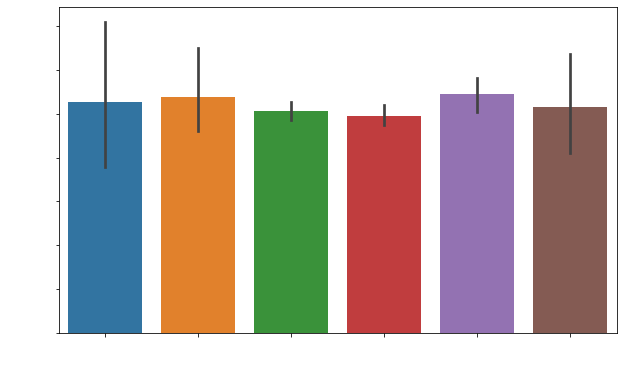

In [115]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('residual sugar', fontsize=16, color='white')

Text(0, 0.5, 'chlorides')

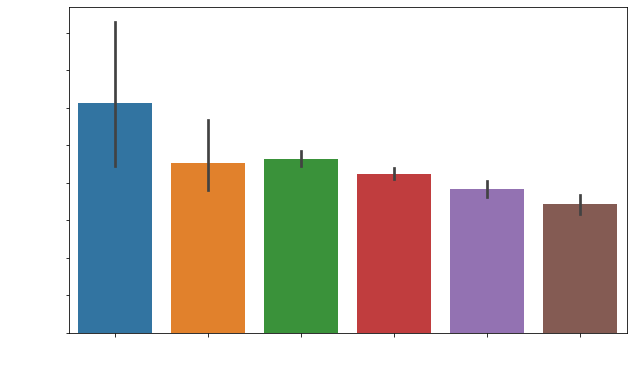

In [116]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('chlorides', fontsize=16, color='white')

Text(0, 0.5, 'free sulfur dioxide')

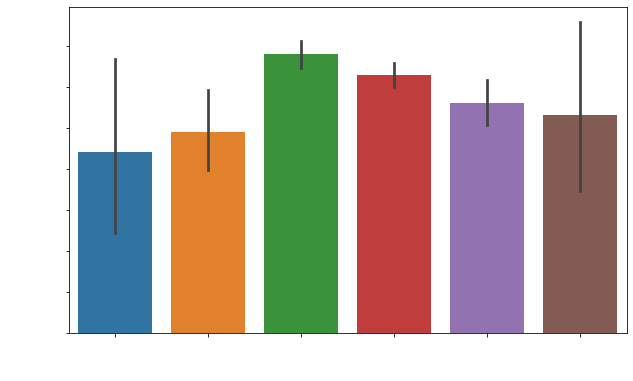

In [117]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('free sulfur dioxide', fontsize=16, color='white')

Text(0, 0.5, 'total sulfur dioxide')

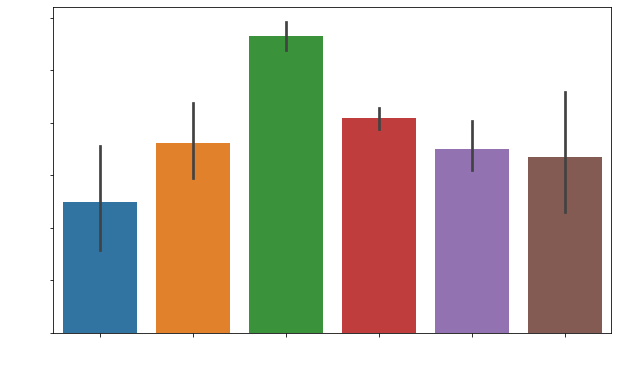

In [118]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('total sulfur dioxide', fontsize=16, color='white')

Text(0, 0.5, 'sulphates')

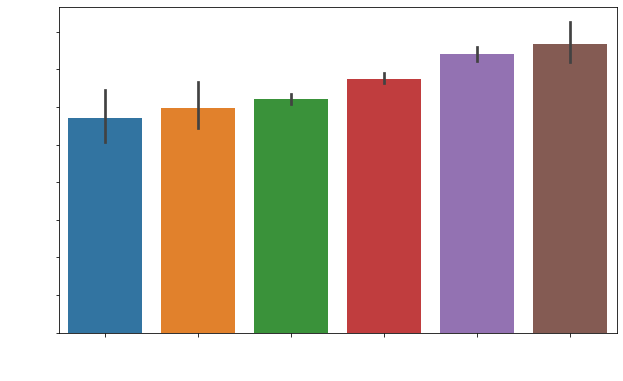

In [119]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('sulphates', fontsize=16, color='white')

Text(0, 0.5, 'alcohol')

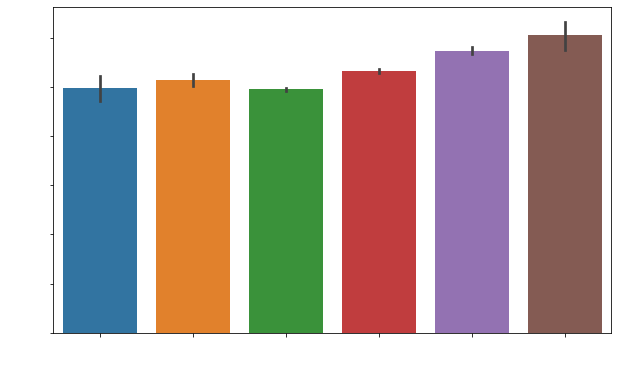

In [120]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('alcohol', fontsize=16, color='white')

In [122]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [123]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [124]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [125]:
label_quality = LabelEncoder()

In [126]:
label_quality

LabelEncoder()

In [127]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [129]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\BIT\anaconda3\envs\data-anal-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

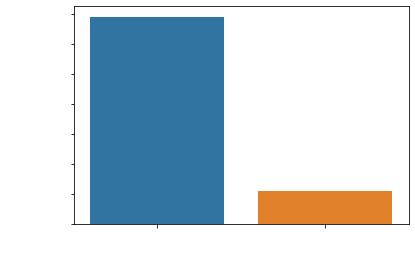

In [130]:
sns.countplot(wine['quality'])
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.xlabel('quality', fontsize=16, color='white')
plt.ylabel('count', fontsize=16, color='white')

In [131]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [132]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [133]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [134]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [135]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [136]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2


In [137]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [138]:
y_train

493     0
354     0
342     0
834     0
705     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: quality, Length: 1279, dtype: int32

In [139]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [140]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [141]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [143]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320



In [144]:
print(confusion_matrix(y_test, pred_rfc))

[[261  12]
 [ 26  21]]
